## Data generation:

In [7]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(rescale=1./255)

##  Read train data:

In [8]:
train_it = datagen.flow_from_directory('data/train/', 
                                       color_mode='grayscale', 
                                       batch_size=250*6, 
                                       target_size=(128, 128), 
                                       class_mode='categorical',
                                       shuffle=False)

Found 1500 images belonging to 6 classes.


0-crazing, 1-inclusion, 2-patches, 3-pitted surface, 4-rolled-in scale, 5-scratches

## Convert data to Numpy array:

In [10]:
X_train, y_train = train_it.next()

# The dataset has two parts: input image X, and its class/label y
print(X_train.shape)
print(y_train.shape)

print(type(X_train))  # Each sample is a 128*128 matrix (image)
print(type(y_train))  # The label/class of each sample is represented by a vector

(1500, 128, 128, 1)
(1500, 6)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Plot one sample image. The image size is 128*128

[0. 0. 0. 0. 0. 1.]


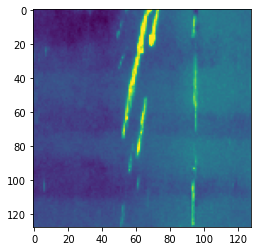

In [12]:
plt.imshow(X_train[1251,:,:,0])
print(y_train[1251])

0-crazing, 1-inclusion, 2-patches, 3-pitted surface, 4-rolled-in scale, 5-scratches

## Read test data:

In [13]:
datagen2 = ImageDataGenerator(rescale=1./255)

test_it = datagen2.flow_from_directory('data/test/', 
                                       color_mode='grayscale', 
                                       batch_size=50*6, 
                                       target_size=(128, 128), 
                                       class_mode='categorical',
                                       shuffle=True)
X_test, y_test = test_it.next()

print(X_test.shape)
print(y_test.shape)

Found 300 images belonging to 6 classes.
(300, 128, 128, 1)
(300, 6)


## packages

In [34]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.losses import SparseCategoricalCrossentropy
from keras import optimizers

## CNN model:

In [66]:
model = Sequential(
    [               
        Input(shape=(128,128,1)),    #specify input size
        
        Convolution2D(32,(3,3), activation="relu", name="L1"),
        MaxPooling2D(pool_size=(2,2), name="L2"),
        Convolution2D(32,(3,3), activation="relu", name="L3"),
        MaxPooling2D(pool_size=(2,2), name="L4"),
        Convolution2D(32,(3,3), activation="relu", name="L5"),
        MaxPooling2D(pool_size=(2,2), name="L6"),
        Flatten(name="L7"),
        Dense(64, activation="relu", name="L8"),
        Dropout(0.5, name="L9"),
        Dense(64, activation="relu", name="L10"),
        Dense(32, activation="relu", name="L11"),
        Dense(6, activation="softmax", name="L12")        
        
    ], name = "my_model" 
)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Conv2D)                 (None, 126, 126, 32)      320       
                                                                 
 L2 (MaxPooling2D)           (None, 63, 63, 32)        0         
                                                                 
 L3 (Conv2D)                 (None, 61, 61, 32)        9248      
                                                                 
 L4 (MaxPooling2D)           (None, 30, 30, 32)        0         
                                                                 
 L5 (Conv2D)                 (None, 28, 28, 32)        9248      
                                                                 
 L6 (MaxPooling2D)           (None, 14, 14, 32)        0         
                                                                 
 L7 (Flatten)                (None, 6272)              0  

In [69]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam', metrics=['accuracy']
)

In [71]:
score = model.evaluate(X_test, y_test, verbose=1)  # Evaluate the loss function of the trained model on validation set
print(score)

10/10 [==============================] - 1s 47ms/step - loss: 0.4403 - accuracy: 0.8200
[0.4403386414051056, 0.8199999928474426]


### An examlpe:

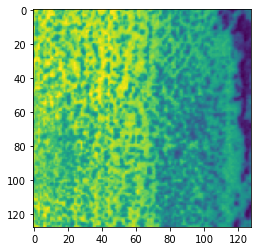

In [76]:
# Pick one image from the test set, and plot it
import numpy as np

m = X_test[5,:,:,:]
tmp = np.squeeze(m)
plt.imshow(tmp)

In [77]:
# Predict the label/class of this image
m = np.expand_dims(m, axis=0)
flg = model.predict(m); print(flg)  # Print the output vector (size 6) from the CNN model
result = np.where(flg == np.amax(flg)) # Get the label/class, which is the location of the MAX value in the vector
print(result[1])

[[1.2295622e-01 3.0885752e-07 1.1766402e-01 3.0072829e-02 7.2924393e-01
  6.2713254e-05]]
[4]


In [78]:
train_it.class_indices

{'crazing': 0,
 'inclusion': 1,
 'patches': 2,
 'pitted surface': 3,
 'rolled-in scale': 4,
 'scratches': 5}